<a href="https://colab.research.google.com/github/aikumiso/VAE-GAN/blob/main/Instead_mid_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Установка библиотек
!pip install tensorflow matplotlib

In [14]:
# Импорты
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
import os



In [15]:
# Загрузка и подготовка данных (используем CIFAR-10 для примера)
def load_data():
    (x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
    x_train = x_train / 255.0  # Нормализация
    x_test = x_test / 255.0
    return x_train, x_test



In [16]:
# Функция для визуализации изображений
def plot_images(images, title):
    plt.figure(figsize=(10, 10))
    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
    plt.suptitle(title)
    plt.show()



In [17]:
# Гибридная модель: Encoder + Decoder (VAE/GAN)
def build_encoder(input_shape):
    inputs = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    latent = layers.Dense(128, activation='relu')(x)
    return models.Model(inputs, latent, name="encoder")



In [18]:
def build_decoder(output_shape):
    latent_dim = 128
    inputs = layers.Input(shape=(latent_dim,))
    x = layers.Dense(8 * 8 * 128, activation='relu')(inputs)
    x = layers.Reshape((8, 8, 128))(x)
    x = layers.Conv2DTranspose(128, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2DTranspose(64, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    outputs = layers.Conv2DTranspose(output_shape[-1], (3, 3), activation='sigmoid', padding='same')(x)
    return models.Model(inputs, outputs, name="decoder")



In [19]:
def build_vae_gan(input_shape):
    encoder = build_encoder(input_shape)
    decoder = build_decoder(input_shape)
    inputs = layers.Input(shape=input_shape)
    latent = encoder(inputs)
    reconstructed = decoder(latent)
    model = models.Model(inputs, reconstructed, name="vae_gan")
    return model, encoder, decoder



In [20]:
# Загрузка данных
x_train, x_test = load_data()
input_shape = x_train.shape[1:]



In [21]:
# Построение и компиляция модели
vae_gan, encoder, decoder = build_vae_gan(input_shape)
vae_gan.compile(optimizer='adam', loss='mse')



In [22]:
# Обучение модели
history = vae_gan.fit(x_train, x_train, epochs=10, batch_size=32, validation_data=(x_test, x_test))



Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 537s 340ms/step - loss: 0.0246 - val_loss: 0.0114
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 566s 343ms/step - loss: 0.0111 - val_loss: 0.0106
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 555s 339ms/step - loss: 0.0105 - val_loss: 0.0105
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 531s 340ms/step - loss: 0.0103 - val_loss: 0.0103
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 562s 340ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 557s 337ms/step - loss: 0.0101 - val_loss: 0.0101
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 559s 335ms/step - loss: 0.0100 - val_loss: 0.0101
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 524s 335ms/step - loss: 0.0099 - val_loss: 0.0100
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 529s 339ms/step - loss: 0.0098 - val_loss: 0.0104
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 561s 338ms/step - loss: 0.0099 - val_loss: 0.0100


In [23]:
# Генерация изображений
latent_space = np.random.normal(size=(9, 128))
generated_images = decoder.predict(latent_space)



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step


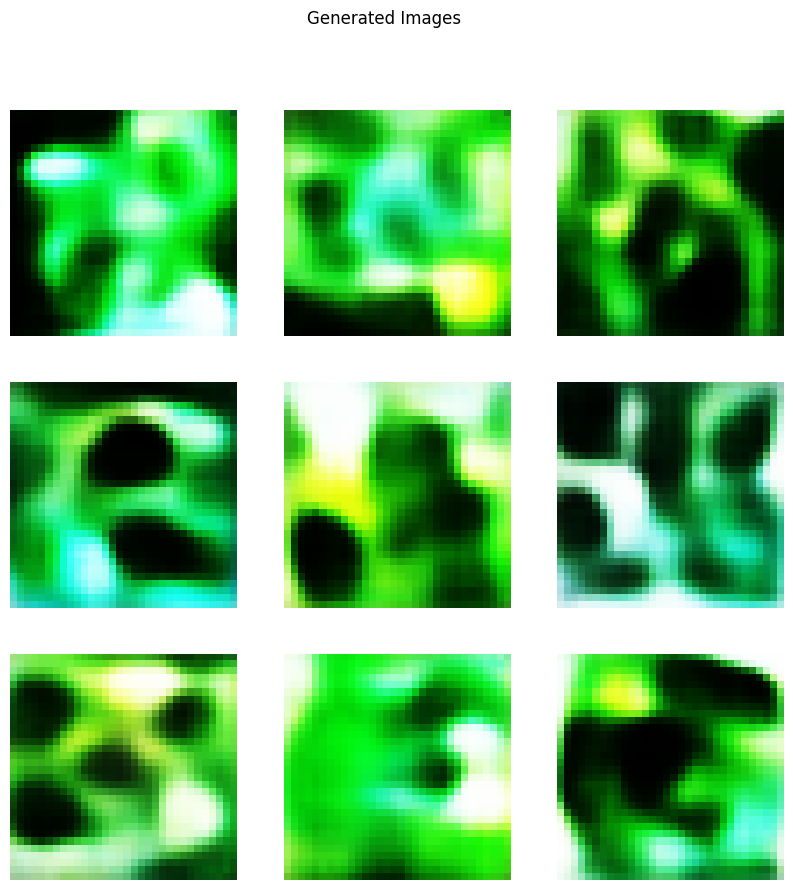

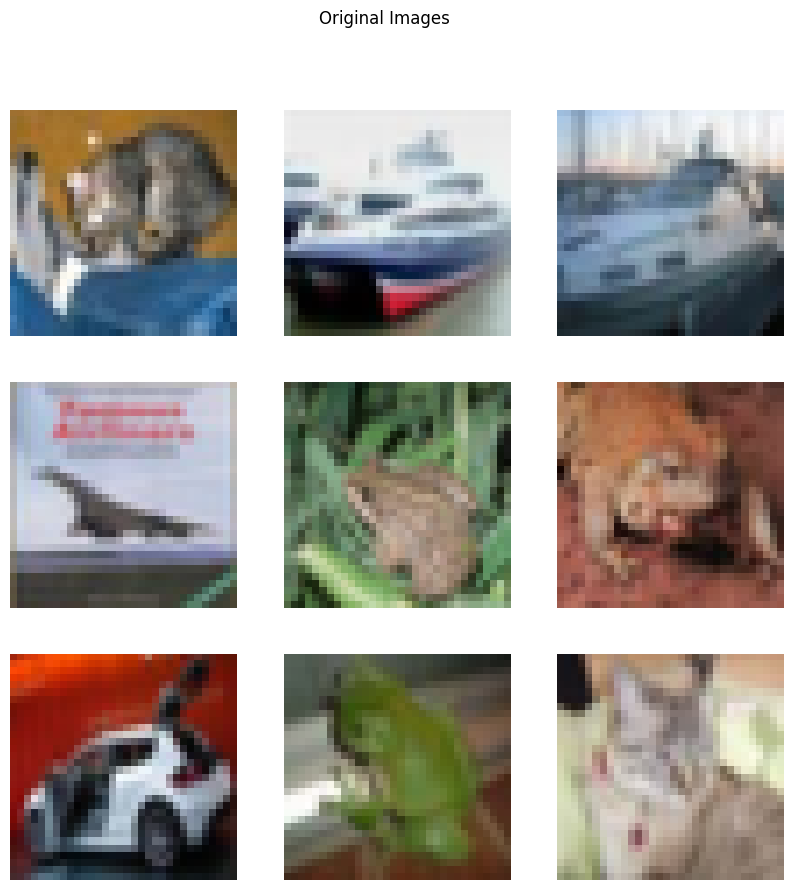

In [24]:
# Визуализация
plot_images(generated_images, title="Generated Images")
plot_images(x_test[:9], title="Original Images")

In [27]:
!pip install tensorflow_gan

In [32]:
from keras.preprocessing.image import array_to_img, img_to_array
from keras.preprocessing.image import load_img

def resize_images(images, target_size=(75, 75)):
    resized_images = []
    for img in images:
        img_resized = array_to_img(img).resize(target_size)
        resized_images.append(img_to_array(img_resized))
    return np.array(resized_images)

real_images_resized = resize_images(real_images)
generated_images_resized = resize_images(generated_images)

In [37]:
import tensorflow as tf

# Функция для изменения размера изображений
def resize_images(images, target_size=(75, 75)):
    resized_images = []
    for img in images:
        img_resized = tf.image.resize(img, target_size).numpy()
        resized_images.append(img_resized)
    return np.array(resized_images)
# Изменение размера изображений
real_images_resized = resize_images(x_test[:100], target_size=(75, 75))
generated_images_resized = resize_images(generated_images, target_size=(75, 75))

In [38]:
# Вычисление FID с измененным размером
fid_score = calculate_fid(real_images_resized, generated_images_resized)
print("FID Score:", fid_score)

4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
FID Score: 0.006527649375182136


In [39]:
real_images_resized = (real_images_resized - 0.5) * 2
generated_images_resized = (generated_images_resized - 0.5) * 2